#  Computational Physics
## Lecture 01 - Some Features

### Querying python floats

In [2]:
import sys
sys.float_info


sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

### Python Dynamic Typing

\begin{align}
f(N) &= \sum_{n=1}^{N} \frac{1}{n} \\
&= \sum_{n=N}^{1} \frac{1}{n}
\end{align}

$$ f(100) = \frac{14466636279520351160221518043104131447711}{2788815009188499086581352357412492142272}
$$

In [3]:
N = 100

# the exact answer for N = 100
f100 = 14466636279520351160221518043104131447711 / 2788815009188499086581352357412492142272

# initialize the sums
s1 = 0.0
s2 = 0.0

# forward sum
for n in range(1,N+1):
    s1 += 1.0/n

# backward sum
for n in range(N,0,-1):
    s2 += 1.0/n

# output results
print(f'f(100)  = {f100:.16f}')
print(f's1      = {s1:.16f}')
print(f's2      = {s2:.16f}')
print(f'|s1-s2| = {abs(s1-s2):.2E}')

f(100)  = 5.1873775176396206
s1      = 5.1873775176396206
s2      = 5.1873775176396215
|s1-s2| = 8.88E-16


### The Mandelbrot Set

[Wikipedia](https://en.wikipedia.org/wiki/Mandelbrot_set)

$$ f(z) = z^2 + z_0 $$

Where $z_0$ is a complex number. Consider the sequence: 

$$\mathcal{M} = (0,f(0),f(f(0)),\ldots)$$

We are interested in the resulting set of complex numbers $\mathcal{M}$ which does not diverge under some number or recursive interations $L$. 

We can thus iterate until $|\mathcal{M}| < \mathcal{M}_{\rm max}$ and plot the resulting final values.



In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
%config InlineBackend.image_format='svg'
# plt.style.use('../include/notebook.mplstyle')

Text(0, 0.5, 'Im $z_0$')

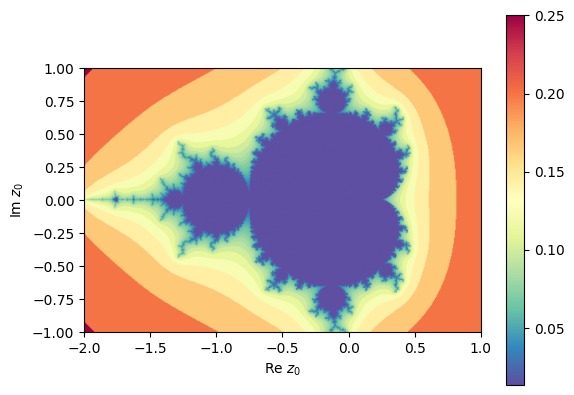

In [9]:
N = 500
Mmax = 100
L = 75

mbset = np.zeros([N,N])

x,y = np.linspace(-2,1,N),np.linspace(-1,1,N)
for j,cx in enumerate(x):
    for i,cy in enumerate(y):
        zₒ = cx + 1j*cy
        z = 0
        for m in range(L):
            if np.abs(z) > Mmax:
                break
            z = z*z + zₒ
            
        mbset[i,j] = 1.0/m
    
plt.imshow(mbset, extent=[-2,1,-1,1], cmap='Spectral_r')
plt.colorbar()
plt.xlabel(r'Re $z_0$')
plt.ylabel(r'Im $z_0$')